# Módulo 10 atividade 1

In [33]:
# Importando bibliotecas a serem usadas e a base de dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')
df.head(2)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [34]:
# Verificando os tipos das colunas para separar as variáveis quantitativas
print(df.dtypes)

# Separando as numéricas
df_numerico = df.select_dtypes(include=['float', 'int'])
print(df_numerico.columns)

# Removendo as colunas numéricas que não tem uso para análise
df_numerico = df_numerico.drop(['Unnamed: 0', 'index'], axis=1)
df_numerico.columns

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object
Index(['Unnamed: 0', 'index', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')


Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [35]:
# Gráfico de correlação entre cada variável numérica
# Quanto mais próximo de 1 mais correlacionadas positivamente e quanto mais próximo de -1 mais 
# correlacionadas negativamente, 1=quando uma aumenta a outra tb e -1=quando uma aumenta a outra diminui

correlacao = df_numerico.corr()
correlacao

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


### Variáveis mais correlacionadas

'qtd_filhos' tem uma correlação de 0.896 com a variável 'qt_pessoas_residencia'.

'idade' tem uma correlação de -0.364 com a variável 'qtd_filhos'.

'idade' tem uma correlação de -0.339 com a variável 'qt_pessoas_residencia'.

'tempo_emprego' tem uma correlação de 0.324 com a variável 'idade'.

'tempo_emprego' tem uma correlação de 0.394 com a variável 'renda'.


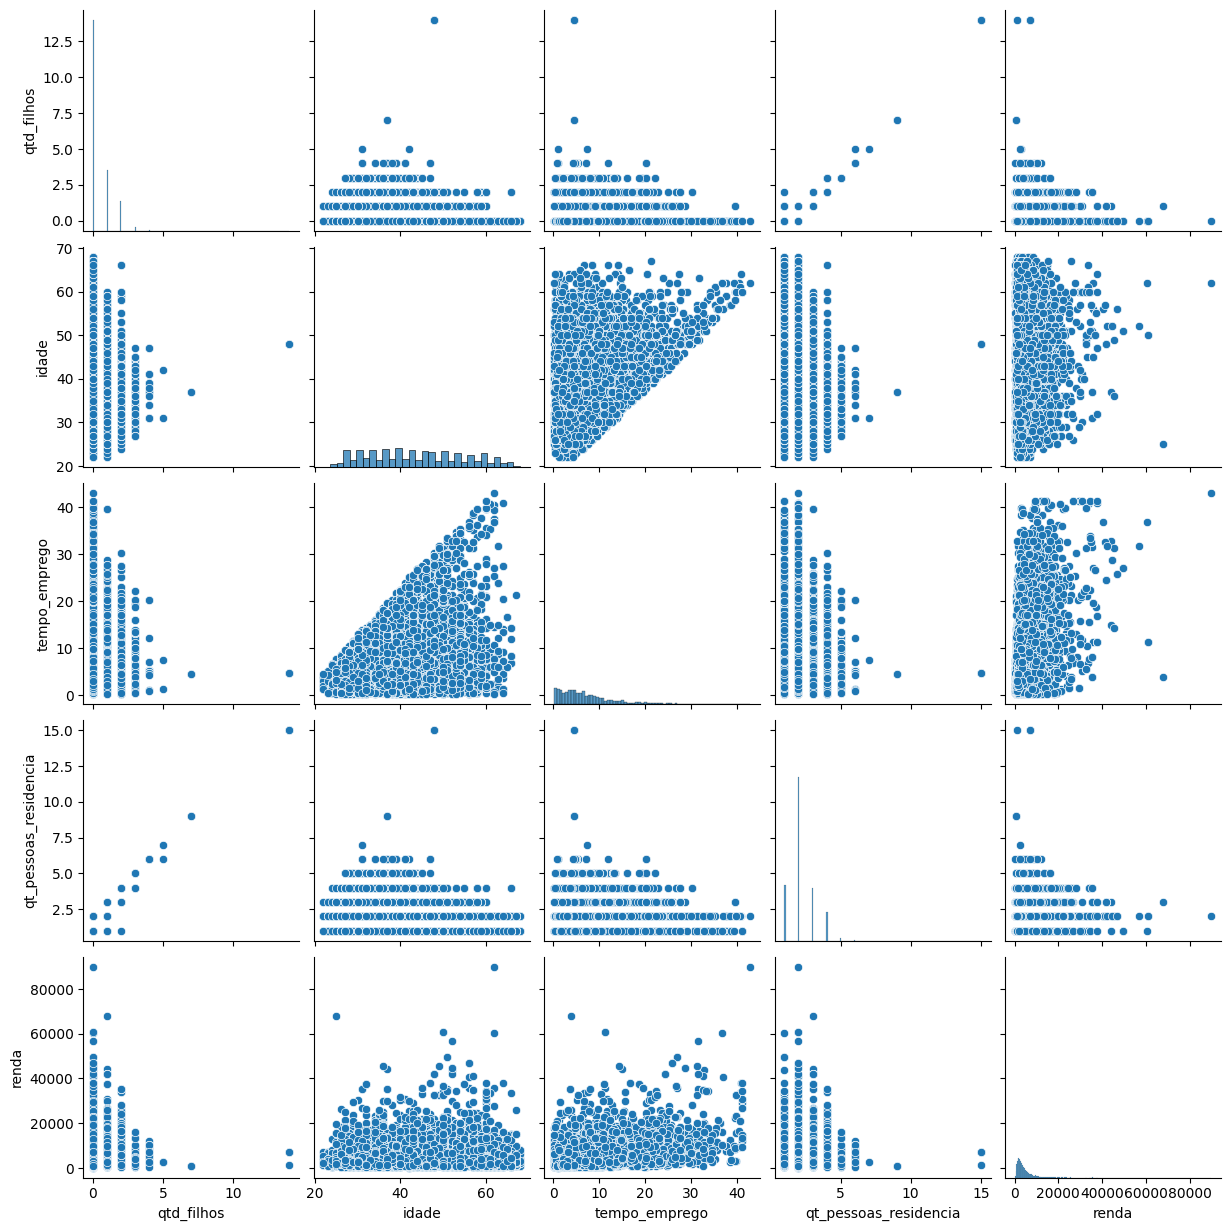

In [36]:
sns.pairplot(df_numerico)

Sabendo que nossa variável target é a renda e os resultados da matriz de correlação, podemos focar nos resultados dessas variáveis correlacionadas e nas relações com a variável renda. Sendo assim podemos observar que:
* Quanto mais filhos, mais pessoas na casa
* Quanto menor a idade, maior a quantidade de filhos e consequentemente pessoas na casa
* Quanto maior a idade, maior o tempo de emprego
* Quanto mais filhos, menor a renda
Como há muitos pontos, será utilizado um gráfico de densidade para analisar melhor o tempo de emprego em relação a renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

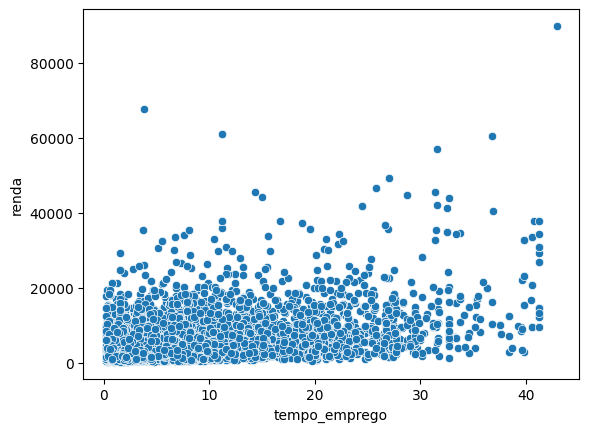

In [39]:
sns.scatterplot(data=df_numerico, x='tempo_emprego', y='renda')

Como o gráfico acima tem muitos pontos se sobrepondo, foi feito um novo gráfico que mostra com a cor mais forte onde eles se sobrepoem mais.

Verificando o gráfico de densidade abaixo, é possível perceber que a grande maioria das pessoas tem menos de 10 anos de tempo de emprego e recebe menos de 5000

C:\Users\Bill_\AppData\Local\Temp\ipykernel_9632\4064800465.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_numerico, x='tempo_emprego', y='renda', shade=True)


Text(0.5, 1.0, 'Distribuição de Renda por Tempo de Emprego')

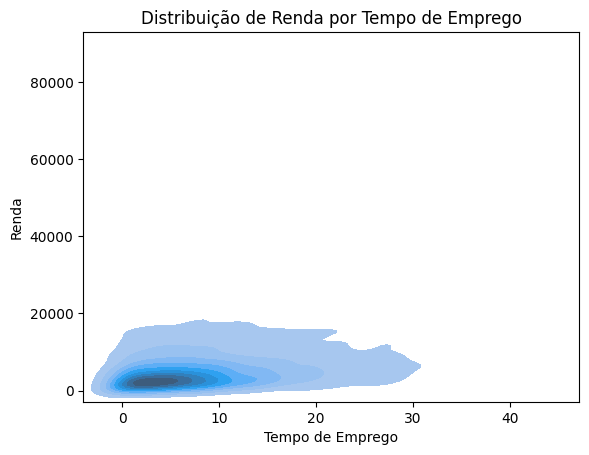

In [40]:
sns.kdeplot(data=df_numerico, x='tempo_emprego', y='renda', shade=True)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Distribuição de Renda por Tempo de Emprego')

Já no gráfico abaixo é possível perceber diretamente que as pessoas com zero filhos normalmente tem uma renda mais elevada e isso decresce a medida que a quantidade de filhos aumenta.

<Axes: xlabel='qtd_filhos', ylabel='renda'>

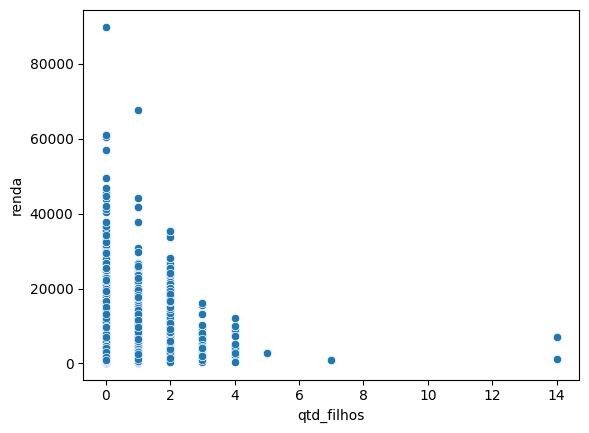

In [42]:
sns.scatterplot(data=df_numerico, x='qtd_filhos', y='renda')

3) Na su aopinião, há outliers na variável renda?

Com certeza, provavelmente em cada variável terá outliers, nas verificações acima tem valores de filhos em 14 e da para ver que há alguns pontos na quantidade de renda que se distanciam muito das outras, sendo acima de 60k.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [45]:
# Criando uma cópia e adicionando a coluna log_renda que tem o logaritimo de renda
df_log = df_numerico.copy()
df_log['log_renda'] = np.log(df_log['renda'])

# Correlação anterior
correlacao = df_numerico.corr()
correlacao

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


In [46]:
# Correlação com a coluna log_renda
correlacao_log = df_log.corr()
correlacao_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

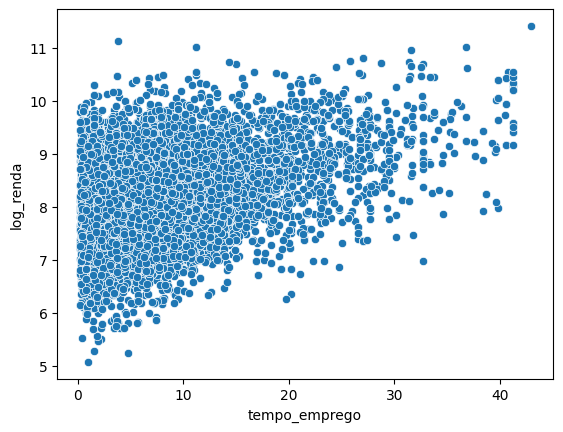

In [49]:
sns.scatterplot(data=df_log, x='tempo_emprego', y='log_renda')

C:\Users\Bill_\AppData\Local\Temp\ipykernel_9632\54693385.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_log, x='tempo_emprego', y='log_renda', shade=True)


Text(0.5, 1.0, 'Distribuição de Renda logaritimica por Tempo de Emprego')

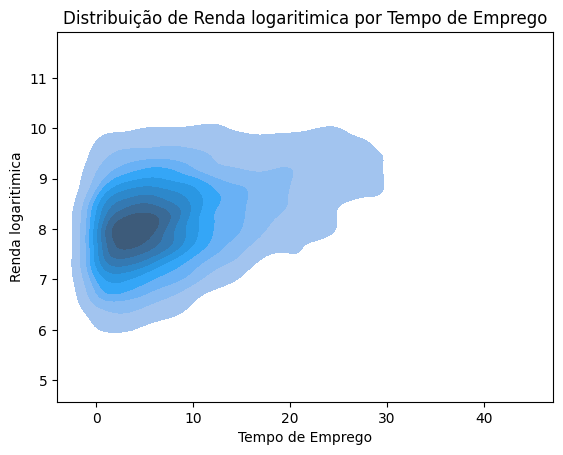

In [52]:
# Gráfico da renda logaritimica por tempo de emprego

sns.kdeplot(data=df_log, x='tempo_emprego', y='log_renda', shade=True)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda logaritimica')
plt.title('Distribuição de Renda logaritimica por Tempo de Emprego')

Text(0.5, 1.0, 'Distribuição de Renda Logaritimica por Quantidade de Filhos')

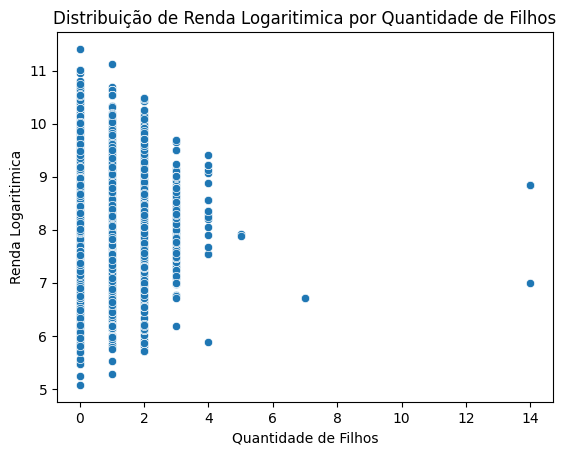

In [53]:
sns.scatterplot(data=df_log, x='qtd_filhos', y='log_renda')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Renda Logaritimica')
plt.title('Distribuição de Renda Logaritimica por Quantidade de Filhos')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Nos casos onde estava difícil fazer uma melhor visualização como no tempo de emprego ficou melhor, principalmente nos valores mais baixos, da para ver que tem uma leve subida da renda conforme o tempo de emprego. Já no gráfico de quantidade de filhos e renda ficou um pouco mais difícil de compreender.